<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.397210,83.981535,97.412820,0.003066,272.794631,272.790548,0.004083
1,0.0,1.0,56.498057,95.617481,86.799889,-0.002752,248.912675,248.914318,-0.001643
2,0.0,2.0,88.593156,62.240256,50.781676,0.002869,211.617956,211.615667,0.002289
3,0.0,3.0,68.614464,54.061107,54.066651,-0.001445,186.740777,186.743385,-0.002608
4,0.0,4.0,53.467627,69.183495,35.351923,0.001596,168.004641,168.003947,0.000694
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.591517,47.622892,28.565645,-0.005249,163.774804,163.777741,-0.002938
29996,999.0,26.0,51.626795,73.061489,24.723568,-0.001870,159.409982,159.411120,-0.001138
29997,999.0,27.0,53.407723,20.783796,90.566693,-0.010123,174.748089,174.755623,-0.007534
29998,999.0,28.0,85.331916,46.733219,87.793130,-0.007576,229.850688,229.855893,-0.005205


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    81.397210  83.981535  97.412820  0.003066  272.794631   
      1.0    56.498057  95.617481  86.799889 -0.002752  248.912675   
      2.0    88.593156  62.240256  50.781676  0.002869  211.617956   
      3.0    68.614464  54.061107  54.066651 -0.001445  186.740777   
      4.0    53.467627  69.183495  35.351923  0.001596  168.004641   
...                ...        ...        ...       ...         ...   
999.0 25.0   77.591517  47.622892  28.565645 -0.005249  163.774804   
      26.0   51.626795  73.061489  24.723568 -0.001870  159.409982   
      27.0   53.407723  20.783796  90.566693 -0.010123  174.748089   
      28.0   85.331916  46.733219  87.793130 -0.007576  229.850688   
      29.0   84.094846  66.470695  47.357066  0.006048  207.928655   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    272.790548  0.004083  
      1.0    248.914318 -0.001643  
      2.0    211.615667  0.002289  
      3.0    186.743385 -0.002608  
      4.0    168.003947  0.000694  
...                 ...       ...  
999.0 25.0   163.777741 -0.002938  
      26.0   159.411120 -0.001138  
      27.0   174.755623 -0.007534  
      28.0   229.855893 -0.005205  
      29.0   207.920908  0.007747  

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    81.397210  83.981535  97.412820  0.003066  272.794631   
      1.0    56.498057  95.617481  86.799889 -0.002752  248.912675   
      2.0    88.593156  62.240256  50.781676  0.002869  211.617956   
      3.0    68.614464  54.061107  54.066651 -0.001445  186.740777   
      4.0    53.467627  69.183495  35.351923  0.001596  168.004641   
...                ...        ...        ...       ...         ...   
999.0 25.0   77.591517  47.622892  28.565645 -0.005249  163.774804   
      26.0   51.626795  73.061489  24.723568 -0.001870  159.409982   
      27.0   53.407723  20.783796  90.566693 -0.010123  174.748089   
      28.0   85.331916  46.733219  87.793130 -0.007576  229.850688   
      29.0   84.094846  66.470695  47.357066  0.006048  207.928655   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    272.790548  0.004083  
      1.0    248.914318 -0.001643  
      2.0    211.615667  0.002289  
      3.0    186.743385 -0.002608  
      4.0    168.003947  0.000694  
...                 ...       ...  
999.0 25.0   163.777741 -0.002938  
      26.0   159.411120 -0.001138  
      27.0   174.755623 -0.007534  
      28.0   229.855893 -0.005205  
      29.0   207.920908  0.007747  

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,81.397210,83.981535,97.412820,0.003066,272.794631,272.790548,0.004083
1,0.0,1.0,56.498057,95.617481,86.799889,-0.002752,248.912675,248.914318,-0.001643
2,0.0,2.0,88.593156,62.240256,50.781676,0.002869,211.617956,211.615667,0.002289
3,0.0,3.0,68.614464,54.061107,54.066651,-0.001445,186.740777,186.743385,-0.002608
4,0.0,4.0,53.467627,69.183495,35.351923,0.001596,168.004641,168.003947,0.000694
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,77.591517,47.622892,28.565645,-0.005249,163.774804,163.777741,-0.002938
29996,999.0,26.0,51.626795,73.061489,24.723568,-0.001870,159.409982,159.411120,-0.001138
29997,999.0,27.0,53.407723,20.783796,90.566693,-0.010123,174.748089,174.755623,-0.007534
29998,999.0,28.0,85.331916,46.733219,87.793130,-0.007576,229.850688,229.855893,-0.005205


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    81.397210  83.981535  97.412820  0.003066  272.794631   
      1.0    56.498057  95.617481  86.799889 -0.002752  248.912675   
      2.0    88.593156  62.240256  50.781676  0.002869  211.617956   
      3.0    68.614464  54.061107  54.066651 -0.001445  186.740777   
      4.0    53.467627  69.183495  35.351923  0.001596  168.004641   
...                ...        ...        ...       ...         ...   
999.0 25.0   77.591517  47.622892  28.565645 -0.005249  163.774804   
      26.0   51.626795  73.061489  24.723568 -0.001870  159.409982   
      27.0   53.407723  20.783796  90.566693 -0.010123  174.748089   
      28.0   85.331916  46.733219  87.793130 -0.007576  229.850688   
      29.0   84.094846  66.470695  47.357066  0.006048  207.928655   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    272.790548  0.004083  
      1.0    248.914318 -0.001643  
      2.0    211.615667  0.002289  
      3.0    186.743385 -0.002608  
      4.0    168.003947  0.000694  
...                 ...       ...  
999.0 25.0   163.777741 -0.002938  
      26.0   159.411120 -0.001138  
      27.0   174.755623 -0.007534  
      28.0   229.855893 -0.005205  
      29.0   207.920908  0.007747  

[30000 rows x 7 columns]

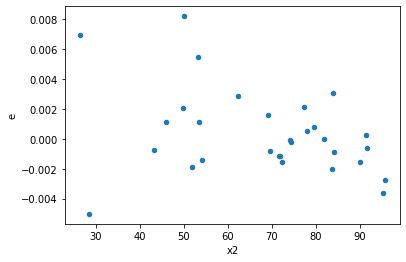

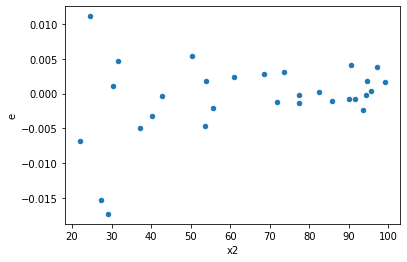

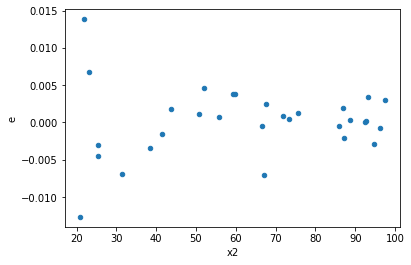

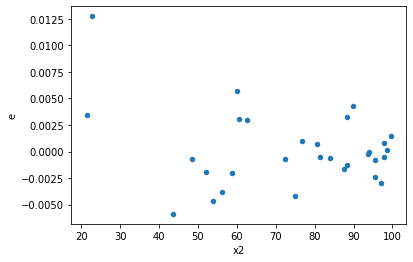

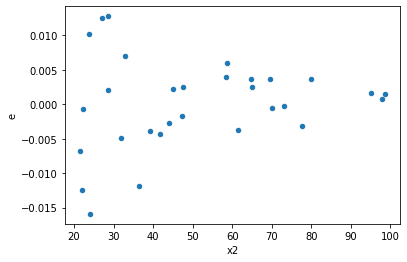

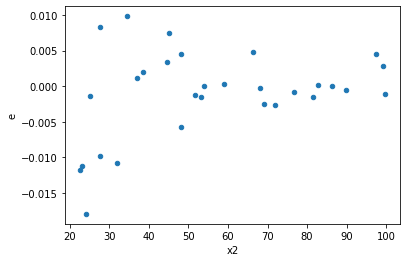

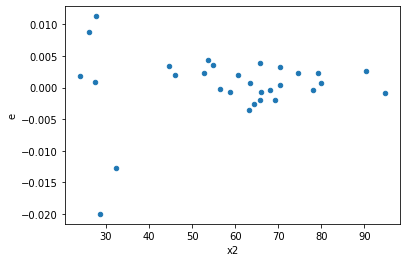

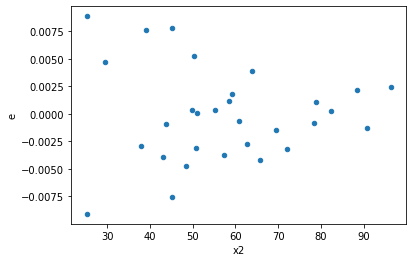

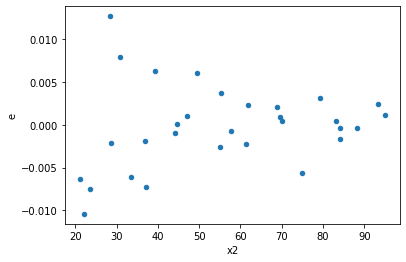

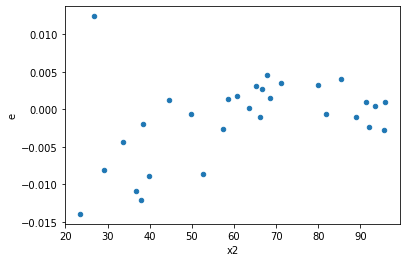

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,13.0,11.0,9.624522934238072e-05,0.000563632201225469,7.4034791801831325e-06,5.1239291020497186e-05,6.920974554456669,0.002875121067155373,0.9985624394664223,0.0014375605335776864,Reject001=0 : Heteroscedasticity
2.0,17.0,7.0,0.0001509839591437843,0.0003222649622614854,8.881409361399076e-06,4.603785175164077e-05,5.183620062794684,0.03414355761166821,0.9829282211941659,0.017071778805834104,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,6.431966359131402e-05,0.00021748973574389662,4.594261685093859e-06,2.174897357438966e-05,4.73394313714312,0.017995628959462273,0.9910021855202689,0.008997814479731137,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,5.300374003319141e-05,0.0008619358132212745,5.889304448132379e-06,5.7462387548084966e-05,9.757075398998516,0.00016246961451149566,0.9999187651927443,8.123480725574783e-05,Reject001=0 : Heteroscedasticity
6.0,17.0,7.0,8.430838948500669e-05,0.0007120663523004798,4.959317028529805e-06,0.00010172376461435426,20.511647879972372,0.0004659053031754734,0.9997670473484123,0.0002329526515877367,Reject001=0 : Heteroscedasticity
7.0,8.0,16.0,9.461398484545135e-05,0.00035086511577397315,1.1826748105681419e-05,2.1929069735873322e-05,1.8541926774730981,0.27908278237162243,0.8604586088141888,0.13954139118581121,Reject001=1 : Homoscedasticity
8.0,16.0,8.0,0.00019883948286784074,0.0003646396475846743,1.2427467679240046e-05,4.557995594808429e-05,3.667678494487266,0.06816165577235811,0.965919172113821,0.034080827886179055,Reject001=1 : Homoscedasticity
9.0,13.0,11.0,0.00015254269568041126,0.0004409323568706237,1.1734053513877789e-05,4.008475971551125e-05,3.4161050712870247,0.048749136291014405,0.9756254318544928,0.024374568145507203,Reject001=1 : Homoscedasticity
10.0,16.0,8.0,9.628435638810211e-05,0.00032319034006198167,6.017772274256382e-06,4.039879250774771e-05,6.713247139738235,0.010251806439310895,0.9948740967803446,0.005125903219655448,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,9.0,0.00016502604670744022,3.000871016442407e-05,1.1001736447162681e-05,3.3343011293804522e-06,0.30307044214282736,0.040190389550662724,Reject001=1 : Homoscedasticity
1.0,13.0,11.0,9.624522934238072e-05,0.000563632201225469,7.4034791801831325e-06,5.1239291020497186e-05,6.920974554456669,0.002875121067155373,Reject001=0 : Heteroscedasticity
2.0,17.0,7.0,0.0001509839591437843,0.0003222649622614854,8.881409361399076e-06,4.603785175164077e-05,5.183620062794684,0.03414355761166821,Reject001=1 : Homoscedasticity
3.0,14.0,10.0,6.431966359131402e-05,0.00021748973574389662,4.594261685093859e-06,2.174897357438966e-05,4.73394313714312,0.017995628959462273,Reject001=1 : Homoscedasticity
4.0,15.0,9.0,0.0007472212792293564,0.00015343878485792961,4.981475194862376e-05,1.704875387310329e-05,0.3422430747158282,0.06448326070021346,Reject001=1 : Homoscedasticity
5.0,9.0,15.0,5.300374003319141e-05,0.0008619358132212745,5.889304448132379e-06,5.7462387548084966e-05,9.757075398998516,0.00016246961451149566,Reject001=0 : Heteroscedasticity
6.0,17.0,7.0,8.430838948500669e-05,0.0007120663523004798,4.959317028529805e-06,0.00010172376461435426,20.511647879972372,0.0004659053031754734,Reject001=0 : Heteroscedasticity
7.0,8.0,16.0,9.461398484545135e-05,0.00035086511577397315,1.1826748105681419e-05,2.1929069735873322e-05,1.8541926774730981,0.27908278237162243,Reject001=1 : Homoscedasticity
8.0,16.0,8.0,0.00019883948286784074,0.0003646396475846743,1.2427467679240046e-05,4.557995594808429e-05,3.667678494487266,0.06816165577235811,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      659
Reject001=0 : Heteroscedasticity    341
Name: Result_test, dtype: int64